Question 3 a

In [ ]:
install.packages("GGally")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘plyr’




In [ ]:
install.packages("faraway")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lme4’





Attaching package: ‘faraway’


The following object is masked from ‘package:GGally’:

    happy





Call:
lm(formula = gamble ~ sex + status + income + verbal, data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.082 -11.320  -1.451   9.452  94.252 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.55565   17.19680   1.312   0.1968    
sex         -22.11833    8.21111  -2.694   0.0101 *  
status        0.05223    0.28111   0.186   0.8535    
income        4.96198    1.02539   4.839 1.79e-05 ***
verbal       -2.95949    2.17215  -1.362   0.1803    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.69 on 42 degrees of freedom
Multiple R-squared:  0.5267,	Adjusted R-squared:  0.4816 
F-statistic: 11.69 on 4 and 42 DF,  p-value: 1.815e-06


 (Intercept)          sex       status       income       verbal 
 22.55565063 -22.11833009   0.05223384   4.96197922  -2.95949350 


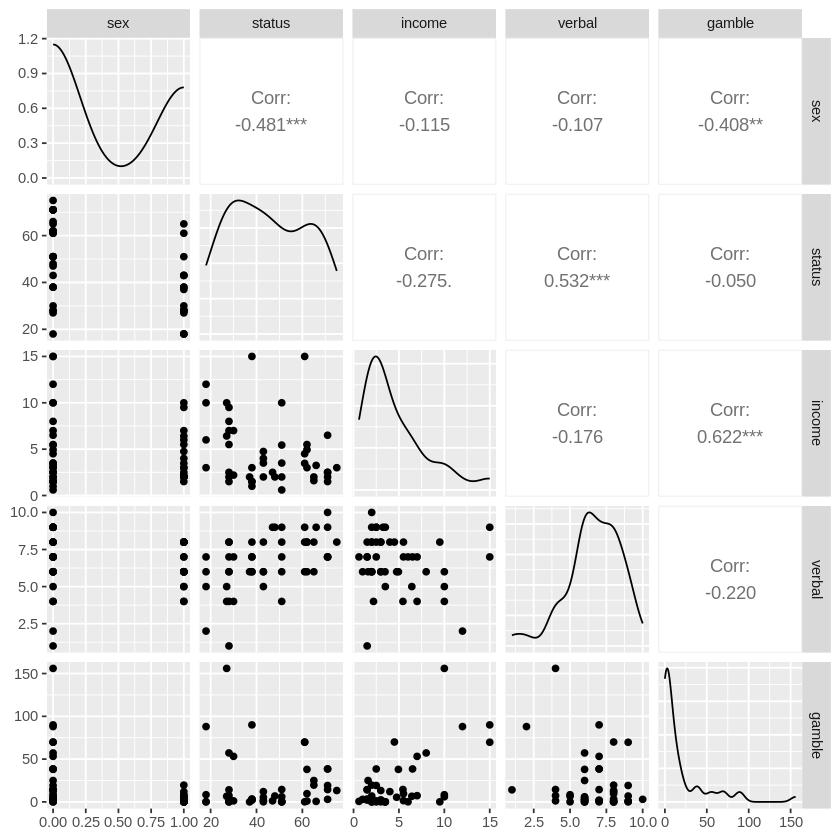

In [ ]:
# Load necessary libraries
library(pander)
library(ggplot2)
library(GGally)
library(faraway)

# Load the dataset
data(teengamb, package="faraway")

# Plot pairwise relationships
ggpairs(teengamb)

# Fit the linear model
lm.fit <- lm(gamble ~ sex + status + income + verbal, data=teengamb)

# Display model summary
summary(lm.fit)

# Print regression coefficients
coefficients <- coef(lm.fit)
print(coefficients)


Question 3 b

In [ ]:
# Fitted values and residuals from the model
fitted_values <- fitted(lm.fit)
residuals <- residuals(lm.fit)

# Sum of squares of residuals (SSR)
ssr <- sum(residuals^2)

# Sample size (n) and number of predictors (p)
n <- length(residuals)
p <- length(coef(lm.fit))

# Unbiased estimate of variance
unbiased_est <- ssr / (n - p)
print(unbiased_est)


[1] 514.8516


Question 3 c

In [ ]:
# Proportion of variance explained by the predictors
var.explained.proportion <- summary(lm.fit)$r.squared
var.unexplained.proportion <- 1 - summary(lm.fit)$r.squared

# Display proportion of variance explained
pander(data.frame(var.explained.proportion= var.explained.proportion), caption="Proportion of Variance Explained")




| var.explained.proportion |
|:------------------------:|
|          0.5267          |

Table: Proportion of Variance Explained



Question 3 d //
 the sample correlation between the residuals and the fitted values in regression models is always zero, this is due to minimizing sume of squared residuals.

Question 3 e
Zero correlation, if Income is a predictor it is already accoutned by model.

Question 3f \\
### Simple Explanation:
beta 1 (coefficient for the variable "sex") will tell us how much more or less males spend on gambling compared to females. if beta 1 is greater than zero, males spend more than female and vice versa

Question 4

Question 4c // The first equation represents the full model, in second equation a condition is put excluding a predictor. This can remove a variable that might be important in the model, that's why model's performace will be reduced and sum of squared residuals will be larger. So first equation will be less than second.


Call:
lm(formula = lpsa ~ lcavol, data = prostate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.67625 -0.41648  0.09859  0.50709  1.89673 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.50730    0.12194   12.36   <2e-16 ***
lcavol       0.71932    0.06819   10.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7875 on 95 degrees of freedom
Multiple R-squared:  0.5394,	Adjusted R-squared:  0.5346 
F-statistic: 111.3 on 1 and 95 DF,  p-value: < 2.2e-16


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("pander"):
“installation of package ‘pander’ had non-zero exit status”




| num.predictors | r.squared | residual.se |
|:--------------:|:---------:|:-----------:|
|       1        |  0.5394   |   0.7875    |
|       2        |  0.5859   |   0.7506    |
|       3        |  0.6264   |   0.7168    |
|       4        |  0.6366   |   0.7108    |
|       5        |  0.6441   |   0.7073    |
|       6        |  0.6451   |   0.7102    |
|       7        |  0.6544   |   0.7048    |
|       8        |  0.6548   |   0.7084    |

Table: Model Stats (continued below)

 

|                            model.string                            |
|:------------------------------------------------------------------:|
|                           lpsa ~ lcavol                            |
|                      lpsa ~ lcavol + lweight                       |
|                   lpsa ~ lcavol + lweight + svi                    |
|                lpsa ~ lcavol + lweight + svi + lbph                |
|             lpsa ~ lcavol + lweight + svi + lbph + age             |
|        

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



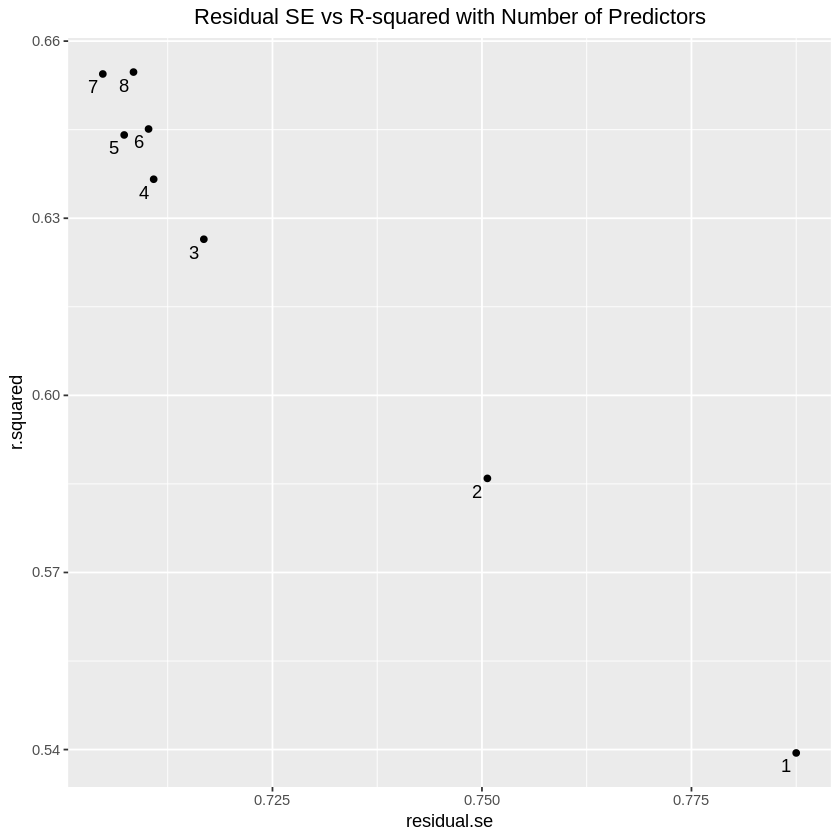

In [ ]:
# Load necessary data and libraries
data(prostate, package="faraway")
library(broom)

# Create a dataframe to hold the results of the experiment
model.stats <- data.frame(num.predictors=integer(), r.squared=numeric(), residual.se=numeric(), model.string=character())

# Fit the first model with 1 predictor
lm.fit <- lm(lpsa ~ lcavol, data=prostate)
summary(lm.fit)
model.summary <- summary(lm.fit)

# Extract statistics
r.squared <-  model.summary$r.squared
residual.se <- model.summary$sigma
model.string <- "lpsa ~ lcavol"

# Append results to the dataframe
model.stats <- rbind(model.stats, list(num.predictors = 1, r.squared=r.squared, residual.se=residual.se, model.string=model.string))

# Fit models with increasing number of predictors
predictor.combinations <- list(
  "lpsa ~ lcavol + lweight",
  "lpsa ~ lcavol + lweight + svi",
  "lpsa ~ lcavol + lweight + svi + lbph",
  "lpsa ~ lcavol + lweight + svi + lbph + age",
  "lpsa ~ lcavol + lweight + svi + lbph + age + lcp",
  "lpsa ~ lcavol + lweight + svi + lbph + age + lcp + pgg45",
  "lpsa ~ lcavol + lweight + svi + lbph + age + lcp + pgg45 + gleason"
)

# Loop through each model combination
for (i in seq_along(predictor.combinations)) {
  lm.fit <- lm(as.formula(predictor.combinations[[i]]), data=prostate)
  model.summary <- summary(lm.fit)

  # Extract statistics
  r.squared <-  model.summary$r.squared
  residual.se <- model.summary$sigma
  model.string <- predictor.combinations[[i]]

  # Append results to the dataframe
  model.stats <- rbind(model.stats, list(num.predictors = i + 1, r.squared = r.squared, residual.se = residual.se, model.string = model.string))
}

# Convert the model strings to character
model.stats$model.string <- as.character(model.stats$model.string)

# Load pander for table display
install.packages("pander")
library(pander)

# Display the model stats
rownames(model.stats) <- NULL
pander(model.stats, caption = "Model Stats")

# Plot the relationship between Residual SE and R-squared
install.packages("ggplot2")
install.packages("GGally")
library(ggplot2)
library(GGally)

p <- ggplot(model.stats, aes(x = residual.se, y = r.squared)) + geom_point()
p <- p + geom_text(aes(label = num.predictors, hjust = 1.5, vjust = 1.5))
p + ggtitle("Residual SE vs R-squared with Number of Predictors") + theme(plot.title = element_text(hjust = 0.5))




> Add blockquote

> Add blockquote





In [ ]:
pasdfasdf

ERROR: Error: object 'pasdfasdf' not found
